In [1]:
import pandas as pd
pd.set_option('display.max_rows',500)
import requests
from bs4 import BeautifulSoup as BS
import json
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from sklearn import linear_model

In [4]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
jh_raw=pd.read_csv(data_path)


## Web Scraping

In [6]:
web_page=requests.get(r'https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html')
bs_soup=BS(web_page.content,'html.parser')

In [7]:
table=bs_soup.find("table")
all_rows=table.find_all('tr')
final_data=[]
for pos,rows in enumerate(all_rows):
    col_list=[eachcol.get_text(strip=True) for eachcol in rows.find_all('td')]
    final_data.append(col_list)

In [9]:
rki_raw=pd.DataFrame(final_data).dropna().rename(columns={0:'state'})
rki_raw

,state,1,2,3,4,5
2,Baden-Württem­berg,44.903,+285,1.440,"13,0",1.867
3,Bayern,61.561,+403,2.415,"18,5",2.645
4,Berlin,12.216,+126,529,"14,1",226
5,Branden­burg,4.003,+19,66,"2,6",169
6,Bremen,2.117,+8,61,"8,9",58
7,Hamburg,6.770,+71,266,"14,4",267
8,Hessen,16.714,+111,663,"10,6",538
9,Meck­lenburg-Vor­pommern,1.055,+9,30,"1,9",20
10,Nieder­sachsen,17.783,+138,524,"6,6",667
11,Nord­rhein-West­falen,61.820,+315,1.619,"9,0",1.828


## REST API calls

In [6]:
data=requests.get('https://services7.arcgis.com/mOBPykOjAyBO2ZKk/arcgis/rest/services/Coronaf%C3%A4lle_in_den_Bundesl%C3%A4ndern/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')

In [7]:
json_object=json.loads(data.content)

In [8]:
fullist=[]
for pos,each_dict in enumerate (json_object['features'][:]):
    fullist.append(each_dict['attributes'])
    

In [9]:
pd.DataFrame(fullist)

,OBJECTID_1,LAN_ew_AGS,LAN_ew_GEN,LAN_ew_BEZ,LAN_ew_EWZ,OBJECTID,Fallzahl,Aktualisierung,AGS_TXT,GlobalID,faelle_100000_EW,Shape__Area,Shape__Length,Death
0,1,01,Schleswig-Holstein,Land,2896712,15,4115,1599256800000,01,fc5ba936-c95c-432c-8a33-9eb2f30b660f,142.057616,4.573731e+10,2.881496e+06,161
1,2,02,Hamburg,Freie und Hansestadt,1841179,6,6451,1599256800000,02,0f3e860c-5181-4d3f-a421-1d51f50315ea,350.373321,2.089396e+09,4.188002e+05,267
2,3,03,Niedersachsen,Land,7982448,9,17210,1599256800000,03,3fd77024-c29b-4843-9be8-682ad48e60c9,215.598022,1.299836e+11,4.008988e+06,665
3,4,04,Bremen,Freie Hansestadt,682986,5,2056,1599256800000,04,4132268b-54de-4327-ac1e-760e915112f1,301.031061,1.119157e+09,3.357177e+05,58
4,5,05,Nordrhein-Westfalen,Land,17932651,10,60085,1599256800000,05,561d658f-3ee5-46e3-bc95-3528c6558ab9,335.059217,8.782936e+10,2.648673e+06,1823
5,6,06,Hessen,Land,6265809,7,15978,1599256800000,06,93277ac4-e8fc-48c7-8940-028dc2ed66af,255.002985,5.235913e+10,2.148244e+06,535
6,7,07,Rheinland-Pfalz,Land,4084844,11,9305,1599256800000,07,e9b4296f-9be2-4e53-9a58-ccf1396cb03d,227.793277,4.783877e+10,1.774430e+06,243
7,8,08,Baden-Württemberg,Land,11069533,1,43259,1599256800000,08,80394ddf-c6a4-4a6e-be8e-0259a81b22a9,390.793360,8.151732e+10,2.544320e+06,1865
8,9,09,Bayern,Freistaat,13076721,2,58692,1599256800000,09,1ff920f4-62cd-4a4f-b8c9-f042f2a3e00a,448.828112,1.634855e+11,3.898618e+06,2641
9,10,10,Saarland,Land,990509,12,3189,1599256800000,10,e3396a6f-8a30-4fdf-8df7-def77dd38bea,321.955681,6.060692e+09,5.626789e+05,174


## 2nd Example.

In [18]:
url_end='https://api.smartable.ai/coronavirus/stats/US'
headers={"Cache-Control": "no-cache", "Subscription-Key": "419b6ec85ddf463c90293a9c94538d0b"}
try:
    response=requests.get(url_end,headers)
except:
    print('Probably a connection error or webpage is not responding.')

Probably a connection error or webpage is not responding.


In [12]:
us_dict=json.loads(response.content)
with open(r'../data/raw/smartai/US_dta.txt','w+') as outfile:
    json.dump(us_dict, outfile, indent=2)

NameError: name 'response' is not defined

In [12]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777


In [13]:
time_idx=pd_raw.columns[4:]
print(time_idx)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '8/24/20', '8/25/20', '8/26/20', '8/27/20', '8/28/20', '8/29/20',
       '8/30/20', '8/31/20', '9/1/20', '9/2/20'],
      dtype='object', length=225)


In [14]:
df_plot=pd.DataFrame({'date':time_idx})

In [15]:
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [16]:
pd_raw[pd_raw['Country/Region']=='US'].iloc[:,4::]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20
242,1,1,2,2,5,5,5,5,5,7,...,5739536,5777710,5821819,5867785,5913941,5961094,5996431,6030587,6073840,6113510


In [17]:
country_list=['India','Italy','US','Germany']
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

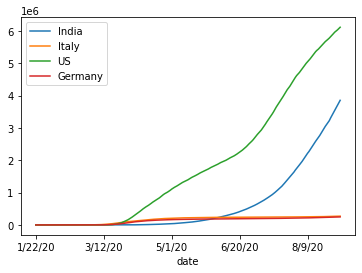

In [18]:
df_plot.set_index('date').plot()

In [19]:
datetime.strptime(df_plot.date[0],'%m/%d/%y')

datetime.datetime(2020, 1, 22, 0, 0)

In [20]:
time_idx=[datetime.strptime(each,'%m/%d/%y') for each in df_plot.date]
time_str=[each.strftime("%Y-%m-%d") for each in time_idx]

In [21]:
time_str[:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [22]:
df_plot['date']=time_str

In [23]:
df_plot.head()

,date,India,Italy,US,Germany
0,2020-01-22,0,0,1,0
1,2020-01-23,0,0,1,0
2,2020-01-24,0,0,2,0
3,2020-01-25,0,0,2,0
4,2020-01-26,0,0,5,0


In [24]:
df_plot.to_csv(r'../data/processed/COVID_small_flat_table.csv',sep=';')

In [25]:
fig=go.Figure()


In [27]:
for each in country_list:
    
    fig.add_trace(go.Scatter(x=df_plot.date, y=df_plot[each], mode="markers+lines",opacity=0.9,line_width=2,marker_size=4,name=each))
fig.update_layout(width=1000,height=800,xaxis_title='Time',yaxis_title='Confimed infrected people',)
fig.update_yaxes(type="log", range=[1.1, 10.5])
fig.show()


In [ ]:
app=dash.Dash()
app.layout=html.Div([dcc.Graph(figure=fig,id='main_window_slope')])
app.run_server(debug=True,use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
!-jt t darkpython